In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md

In [ ]:
with open("/content/drive/MyDrive/smart/Combined_LabelledData_18_역률평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    json_data = json.loads(content)

In [ ]:
for_soh = json_data['data'][:]

In [ ]:
all_data = []
for i in for_soh:
  if i['ITEM_NAME'] == '역률평균':
    all_data.append(i)

In [ ]:
data = pd.DataFrame(all_data)

In [ ]:
data

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
0,역률평균,0.676000,2020-09-16 00:00:00,주의
1,역률평균,0.674000,2020-09-16 00:01:00,주의
2,역률평균,0.675000,2020-09-16 00:02:00,주의
3,역률평균,0.677000,2020-09-16 00:03:00,주의
4,역률평균,0.674000,2020-09-16 00:04:00,주의
...,...,...,...,...
53275,역률평균,0.669112,2020-10-22 23:55:56,주의
53276,역률평균,0.670384,2020-10-22 23:56:56,주의
53277,역률평균,0.671791,2020-10-22 23:57:56,주의
53278,역률평균,0.668714,2020-10-22 23:58:56,주의


In [ ]:
data2 = data[data.LABEL_NAME == '정상']

In [ ]:
data3 = data[data.LABEL_NAME == '주의']

In [ ]:
frames = [data2,data3]

In [ ]:
data4 = pd.concat(frames)

In [ ]:
data4
#정상과 주의만 있다, 여기서 저는 주의도 정상 데이터로 취급

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
540,역률평균,0.856000,2020-09-16 09:00:00,정상
541,역률평균,0.841000,2020-09-16 09:01:00,정상
542,역률평균,0.817000,2020-09-16 09:02:00,정상
543,역률평균,0.855000,2020-09-16 09:03:00,정상
544,역률평균,0.793000,2020-09-16 09:04:00,정상
...,...,...,...,...
53275,역률평균,0.669112,2020-10-22 23:55:56,주의
53276,역률평균,0.670384,2020-10-22 23:56:56,주의
53277,역률평균,0.671791,2020-10-22 23:57:56,주의
53278,역률평균,0.668714,2020-10-22 23:58:56,주의


In [ ]:
data4.describe()
# 평균이 0.671218 임을 확인

,ITEM_VALUE
count,49953.000000
mean,0.671218
std,0.034470
min,0.029000
25%,0.660000
50%,0.666000
75%,0.672000
max,0.923000


In [ ]:
data.loc[(data.LABEL_NAME == '경고'), 'ITEM_VALUE'] = 0.671218
# 경고, 즉 anomaly 항을 평균으로 대체하여 이를 정상데이터로 만들어줌

In [ ]:
data[data.LABEL_NAME == '경고']

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
807,역률평균,0.671218,2020-09-16 13:27:00,경고
808,역률평균,0.671218,2020-09-16 13:28:00,경고
827,역률평균,0.671218,2020-09-16 13:47:00,경고
828,역률평균,0.671218,2020-09-16 13:48:00,경고
829,역률평균,0.671218,2020-09-16 13:49:00,경고
...,...,...,...,...
53062,역률평균,0.671218,2020-10-22 20:22:56,경고
53063,역률평균,0.671218,2020-10-22 20:23:56,경고
53064,역률평균,0.671218,2020-10-22 20:24:56,경고
53065,역률평균,0.671218,2020-10-22 20:25:56,경고


In [ ]:
data = data.drop(columns = ["ITEM_NAME","LABEL_NAME"])

In [ ]:
data = data.reindex(columns = ['TIMESTAMP','ITEM_VALUE'])

In [ ]:
train_data = data

In [ ]:
test_data = pd.DataFrame(all_data)

In [ ]:
test_data = test_data.drop(columns = ["ITEM_NAME","LABEL_NAME"])

In [ ]:
data11 = test_data.reindex(columns = ['TIMESTAMP','ITEM_VALUE'])

In [ ]:
test_data = data11

In [ ]:
train_data

,TIMESTAMP,ITEM_VALUE
0,2020-09-16 00:00:00,0.676000
1,2020-09-16 00:01:00,0.674000
2,2020-09-16 00:02:00,0.675000
3,2020-09-16 00:03:00,0.677000
4,2020-09-16 00:04:00,0.674000
...,...,...
53275,2020-10-22 23:55:56,0.669112
53276,2020-10-22 23:56:56,0.670384
53277,2020-10-22 23:57:56,0.671791
53278,2020-10-22 23:58:56,0.668714


In [ ]:
#오버피팅을 방지하기 위해서 이 전체 데이터에서 80퍼를 train, 뒤에 20퍼를 test로 쓰겠다.
# 0.8*53280 = 42624, 즉 train_data에서 0~ 42623을 train_data로 쓰고 test_data에서 42624~53279를 test_data로 쓰겠다
# 이렇게 하려고 했는데 이따 구할 TIMESTAMP의 편의를 위해 train_data는 9월 16일부터 10월 14일 (29일), test_data는 10월 15일 부터 나머지
# 이렇게 하려고 했는데 train하는데 너무 시간이 많이 걸려서 3일치 씩 (4320)으로 변경

In [ ]:
train_data 

,TIMESTAMP,ITEM_VALUE
0,2020-09-16 00:00:00,0.676000
1,2020-09-16 00:01:00,0.674000
2,2020-09-16 00:02:00,0.675000
3,2020-09-16 00:03:00,0.677000
4,2020-09-16 00:04:00,0.674000
...,...,...
53275,2020-10-22 23:55:56,0.669112
53276,2020-10-22 23:56:56,0.670384
53277,2020-10-22 23:57:56,0.671791
53278,2020-10-22 23:58:56,0.668714


In [ ]:
train_data = data
train_data = train_data.head(4320)
train_data

,TIMESTAMP,ITEM_VALUE
0,2020-09-16 00:00:00,0.676
1,2020-09-16 00:01:00,0.674
2,2020-09-16 00:02:00,0.675
3,2020-09-16 00:03:00,0.677
4,2020-09-16 00:04:00,0.674
...,...,...
4315,2020-09-18 23:55:00,0.659
4316,2020-09-18 23:56:00,0.660
4317,2020-09-18 23:57:00,0.657
4318,2020-09-18 23:58:00,0.659


In [ ]:
test_data = data11
test_data = test_data.tail(4320)
test_data

,TIMESTAMP,ITEM_VALUE
48960,2020-10-20 00:00:00,0.677000
48961,2020-10-20 00:01:00,0.655000
48962,2020-10-20 00:02:00,0.653000
48963,2020-10-20 00:03:00,0.651000
48964,2020-10-20 00:04:00,0.656000
...,...,...
53275,2020-10-22 23:55:56,0.669112
53276,2020-10-22 23:56:56,0.670384
53277,2020-10-22 23:57:56,0.671791
53278,2020-10-22 23:58:56,0.668714


In [ ]:
check = pd.DataFrame(all_data)

print(check.index[check['LABEL_NAME']=='경고'].tolist())
# anomaly한 항들이 골고루 퍼져 있었으며

[807, 808, 827, 828, 829, 830, 831, 832, 857, 858, 859, 908, 909, 910, 911, 912, 913, 932, 933, 934, 935, 936, 937, 960, 961, 962, 963, 964, 1957, 1958, 1959, 1960, 1961, 1962, 2003, 2004, 2005, 2006, 2007, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2089, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3

In [ ]:
check[check.LABEL_NAME == '경고']
# 약 6% 정도임으로 적절하다고 판단했다.

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
807,역률평균,0.552000,2020-09-16 13:27:00,경고
808,역률평균,0.555000,2020-09-16 13:28:00,경고
827,역률평균,0.566000,2020-09-16 13:47:00,경고
828,역률평균,0.560000,2020-09-16 13:48:00,경고
829,역률평균,0.567000,2020-09-16 13:49:00,경고
...,...,...,...,...
53062,역률평균,0.558626,2020-10-22 20:22:56,경고
53063,역률평균,0.555683,2020-10-22 20:23:56,경고
53064,역률평균,0.556321,2020-10-22 20:24:56,경고
53065,역률평균,0.556596,2020-10-22 20:25:56,경고


In [ ]:
test_data = test_data.reset_index()

In [ ]:
test_data = test_data.drop(columns = ['index'])

In [ ]:
train_data.rename(columns={'TIMESTAMP':'timestamp','ITEM_VALUE':'value'}, inplace = True)
test_data.rename(columns={'TIMESTAMP':'timestamp','ITEM_VALUE':'value'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(train_data.head())
print(test_data.head())

             timestamp  value
0  2020-09-16 00:00:00  0.676
1  2020-09-16 00:01:00  0.674
2  2020-09-16 00:02:00  0.675
3  2020-09-16 00:03:00  0.677
4  2020-09-16 00:04:00  0.674
             timestamp  value
0  2020-10-20 00:00:00  0.677
1  2020-10-20 00:01:00  0.655
2  2020-10-20 00:02:00  0.653
3  2020-10-20 00:03:00  0.651
4  2020-10-20 00:04:00  0.656


In [ ]:
def plot_dates_values(data):
    dates = data["timestamp"].to_list()
    values = data["value"].to_list()
    dates = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in dates]
    plt.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=25)
    ax = plt.gca()
    xfmt = md.DateFormatter("%Y-%m-%d %H:%M:%S")
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(dates, values)
    plt.show()

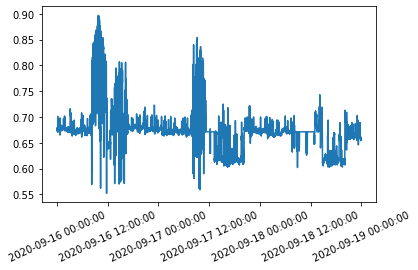

In [ ]:
plot_dates_values(train_data)

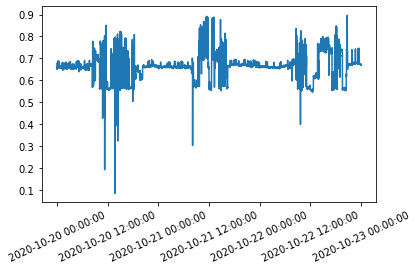

In [ ]:
plot_dates_values(test_data)

In [ ]:
def get_value_from_df(df):
    return df.value.to_list()


def normalize(values):
    mean = np.mean(values)
    values -= mean
    std = np.std(values)
    values /= std
    return values, mean, std


# Get the `value` column from the training dataframe.
training_value = get_value_from_df(train_data)

# Normalize `value` and save the mean and std we get,
# for normalizing test data.
training_value, training_mean, training_std = normalize(training_value)
len(training_value)

4320

In [ ]:
# 24*60 = 1440 per day
# 1440*29 = 41760
TIME_STEPS = 1440


def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)


x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)

Training input shape:  (2880, 1440, 1)


In [ ]:
# Build a model
n_steps = x_train.shape[1]
n_features = x_train.shape[2]

keras.backend.clear_session()
model = keras.Sequential(
    [
        layers.Input(shape=(n_steps, n_features)),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),
        layers.LSTM(
            units=25, activation="tanh", name="lstm_1", return_sequences=False
        ),
        layers.RepeatVector(n_steps),
        layers.LSTM(
            units=25, activation="tanh", name="lstm_2", return_sequences=True
        ),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),
        layers.TimeDistributed(layers.Dense(1, activation='linear'))
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1440, 32)          512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                5800      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1440, 25)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1440, 25)          5100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1440, 32)          12032     
_________________________________________________________________
time_distributed (TimeDistri (None, 1440, 1)           33        
Total params: 23,477
Trainable params: 23,477
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="min", restore_best_weights=True)
    ],
)

Epoch 1/100
21/21 [==============================] - 57s 3s/step - loss: 0.9096 - val_loss: 0.3952
Epoch 2/100
21/21 [==============================] - 52s 2s/step - loss: 0.9060 - val_loss: 0.3573
Epoch 3/100
21/21 [==============================] - 52s 2s/step - loss: 0.9052 - val_loss: 0.3808
Epoch 4/100
21/21 [==============================] - 52s 2s/step - loss: 0.8890 - val_loss: 0.3565
Epoch 5/100
21/21 [==============================] - 51s 2s/step - loss: 0.8341 - val_loss: 0.3307
Epoch 6/100
21/21 [==============================] - 52s 2s/step - loss: 0.8443 - val_loss: 0.3257
Epoch 7/100
21/21 [==============================] - 53s 3s/step - loss: 0.8606 - val_loss: 0.3328
Epoch 8/100
21/21 [==============================] - 52s 2s/step - loss: 0.8502 - val_loss: 0.3388
Epoch 9/100
21/21 [==============================] - 53s 3s/step - loss: 0.8304 - val_loss: 0.3284
Epoch 10/100
21/21 [==============================] - 52s 2s/step - loss: 0.8269 - val_loss: 0.3255
Epoch 11/

In [ ]:
x_train

array([[[ 0.06966229],
        [ 0.02290066],
        [ 0.04628148],
        ...,
        [ 0.49051696],
        [ 0.02290066],
        [-0.02386097]],

       [[ 0.02290066],
        [ 0.04628148],
        [ 0.09304311],
        ...,
        [ 0.02290066],
        [-0.02386097],
        [ 0.02290066]],

       [[ 0.04628148],
        [ 0.09304311],
        [ 0.02290066],
        ...,
        [-0.02386097],
        [ 0.02290066],
        [-0.02386097]],

       ...,

       [[-0.0706226 ],
        [-0.0706226 ],
        [-0.11738422],
        ...,
        [-0.44471563],
        [-0.32781156],
        [-0.30443074]],

       [[-0.0706226 ],
        [-0.11738422],
        [-0.14076504],
        ...,
        [-0.32781156],
        [-0.30443074],
        [-0.37457319]],

       [[-0.11738422],
        [-0.14076504],
        [-0.09400341],
        ...,
        [-0.30443074],
        [-0.37457319],
        [-0.32781156]]])

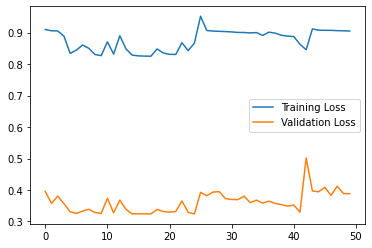

In [ ]:
#ㅅ.ㅂ 학습이 전혀 안된듯
# keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="min", restore_best_weights=True)
# 중간에 멈춘거 보니까 저거 작동된듯
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
#TIME_STEP이 너무 커서 그런가 싶어서 조정해봤다
# 24*60 = 1440 per day
# 1440/5 = 288
# 288*5*29 = 41760
TIME_STEPS = 288


def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)


x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)

Training input shape:  (4032, 288, 1)


In [ ]:
# Build a model
n_steps = x_train.shape[1]
n_features = x_train.shape[2]

keras.backend.clear_session()
model = keras.Sequential(
    [
        layers.Input(shape=(n_steps, n_features)),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),
        layers.LSTM(
            units=25, activation="tanh", name="lstm_1", return_sequences=False
        ),
        layers.RepeatVector(n_steps),
        layers.LSTM(
            units=25, activation="tanh", name="lstm_2", return_sequences=True
        ),
        layers.Conv1D(filters=32, kernel_size=15, padding='same', data_format='channels_last',
            dilation_rate=1, activation="linear"),
        layers.TimeDistributed(layers.Dense(1, activation='linear'))
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 288, 32)           512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                5800      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 288, 25)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 288, 25)           5100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 288, 32)           12032     
_________________________________________________________________
time_distributed (TimeDistri (None, 288, 1)            33        
Total params: 23,477
Trainable params: 23,477
Non-trainable params: 0
____________________________________________________

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="min", restore_best_weights=True)
    ],
)

Epoch 1/100
29/29 [==============================] - 18s 497ms/step - loss: 0.9412 - val_loss: 0.7571
Epoch 2/100
29/29 [==============================] - 14s 466ms/step - loss: 0.8989 - val_loss: 0.6330
Epoch 3/100
29/29 [==============================] - 14s 476ms/step - loss: 0.8842 - val_loss: 0.7070
Epoch 4/100
29/29 [==============================] - 14s 474ms/step - loss: 0.8756 - val_loss: 0.6786
Epoch 5/100
29/29 [==============================] - 14s 482ms/step - loss: 0.8465 - val_loss: 0.6850
Epoch 6/100
29/29 [==============================] - 13s 462ms/step - loss: 0.8280 - val_loss: 0.7307
Epoch 7/100
29/29 [==============================] - 14s 496ms/step - loss: 0.8743 - val_loss: 0.6642
Epoch 8/100
29/29 [==============================] - 14s 493ms/step - loss: 0.9043 - val_loss: 0.7374
Epoch 9/100
29/29 [==============================] - 14s 474ms/step - loss: 0.8674 - val_loss: 0.7007
Epoch 10/100
29/29 [==============================] - 14s 493ms/step - loss: 0.831

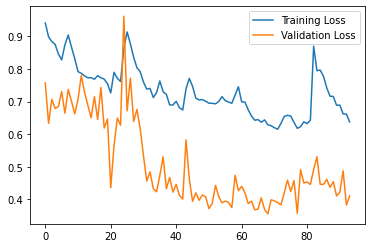

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

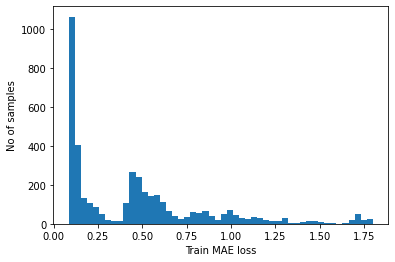

Reconstruction error threshold:  1.8013226885884035


In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

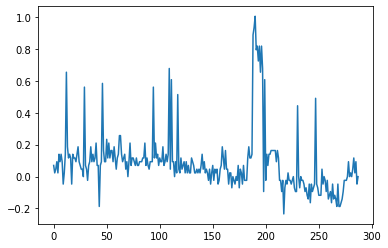

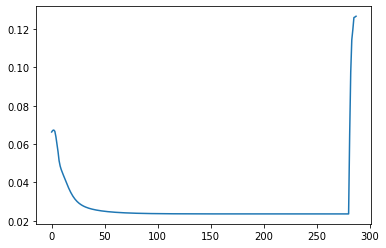

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.show()
plt.plot(x_train_pred[0])
plt.show()

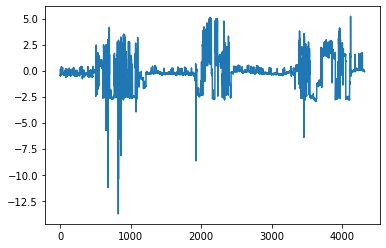

Test input shape:  (4032, 288, 1)


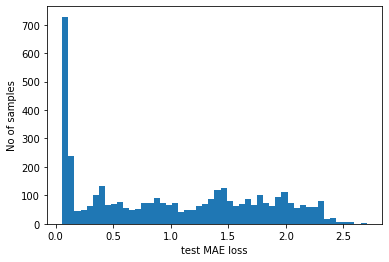

Number of anomaly samples:  800
Indices of anomaly samples:  (array([  68,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
         79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
         90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
        101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
        112,  113,  114,  115,  116,  117,  118,  119,  127,  128,  130,
        173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
        184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
        195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
        206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
        217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
        544,  545,  547,  548,  549,  553,  554,  555,  561,  562,  563,
        566,  567,  571,  572,  576,  577,  578,  579,  580,  581,  582,
        583,  584,  585,  586,  587,  588,  589,  590,  591,  

In [ ]:
def normalize_test(values, mean, std):
    values -= mean
    values /= std
    return values


test_value = get_value_from_df(test_data)
test_value = normalize_test(test_value, training_mean, training_std)
plt.plot(test_value.tolist())
plt.show()

# Create sequences from test values.
x_test = create_sequences(test_value)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = (test_mae_loss > threshold).tolist()
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
check = pd.DataFrame(all_data)
check = check.tail(4032)
check = check.reset_index()
check.drop(columns = ["index"], inplace = True)
checklist = check.index[check['LABEL_NAME']=='경고'].tolist()

In [ ]:
checklist

[216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 251,
 252,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 490,
 491,
 492,
 493,
 494,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557

In [ ]:
ano_checklist = np.where(anomalies)

In [ ]:
ano_checklist

(array([  68,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
          79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
          90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
         101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
         112,  113,  114,  115,  116,  117,  118,  119,  127,  128,  130,
         173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
         184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
         195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
         206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
         217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
         544,  545,  547,  548,  549,  553,  554,  555,  561,  562,  563,
         566,  567,  571,  572,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598, 

In [ ]:
checklist = np.array(checklist)

In [ ]:
len(checklist)

614

In [ ]:
np.sum(anomalies)

800

In [ ]:
ano_checklist

(array([  68,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
          79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
          90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
         101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
         112,  113,  114,  115,  116,  117,  118,  119,  127,  128,  130,
         173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
         184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
         195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
         206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
         217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
         544,  545,  547,  548,  549,  553,  554,  555,  561,  562,  563,
         566,  567,  571,  572,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598, 

In [79]:
history = model.fit(
    x_train,
    x_train,
    epochs=200,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, mode="min", restore_best_weights=True)
    ],
)

Epoch 1/200
29/29 [==============================] - 14s 478ms/step - loss: 0.5774 - val_loss: 0.3474
Epoch 2/200
29/29 [==============================] - 14s 478ms/step - loss: 0.5900 - val_loss: 0.4318
Epoch 3/200
29/29 [==============================] - 14s 479ms/step - loss: 0.5830 - val_loss: 0.3653
Epoch 4/200
29/29 [==============================] - 14s 479ms/step - loss: 0.5736 - val_loss: 0.3688
Epoch 5/200
29/29 [==============================] - 14s 479ms/step - loss: 0.6173 - val_loss: 0.3944
Epoch 6/200
29/29 [==============================] - 14s 472ms/step - loss: 0.7313 - val_loss: 0.3554
Epoch 7/200
29/29 [==============================] - 14s 475ms/step - loss: 0.6962 - val_loss: 0.3966
Epoch 8/200
29/29 [==============================] - 14s 485ms/step - loss: 0.7008 - val_loss: 0.4132
Epoch 9/200
29/29 [==============================] - 14s 484ms/step - loss: 0.6817 - val_loss: 0.4382
Epoch 10/200
29/29 [==============================] - 14s 481ms/step - loss: 0.663

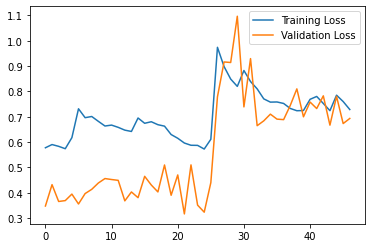

In [80]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()